In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization, LeakyReLU
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import time
import cv2
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras import models, layers
import matplotlib.pyplot as plt

In [54]:
directory = 'embryos'

In [109]:
# Import data and split to train and test with validation split
ds_train = tf.keras.preprocessing.image_dataset_from_directory(directory,
                                                              labels='inferred',
                                                              label_mode ='int',
                                                              class_names = ['0', '1'],
                                                              color_mode = 'rgb',
                                                              image_size = (256, 256),
                                                              shuffle = True,
                                                              seed = 123,
                                                              validation_split = 0.2,
                                                              subset = 'training')
ds_test = tf.keras.preprocessing.image_dataset_from_directory(directory,
                                                              labels='inferred',
                                                              label_mode ='int',
                                                              class_names = ['0', '1'],
                                                              color_mode = 'rgb',
                                                              image_size = (256, 256),
                                                              shuffle = True,
                                                              seed = 123,
                                                              validation_split = 0.2,
                                                              subset = 'validation')

Found 219 files belonging to 2 classes.
Using 176 files for training.
Found 219 files belonging to 2 classes.
Using 43 files for validation.


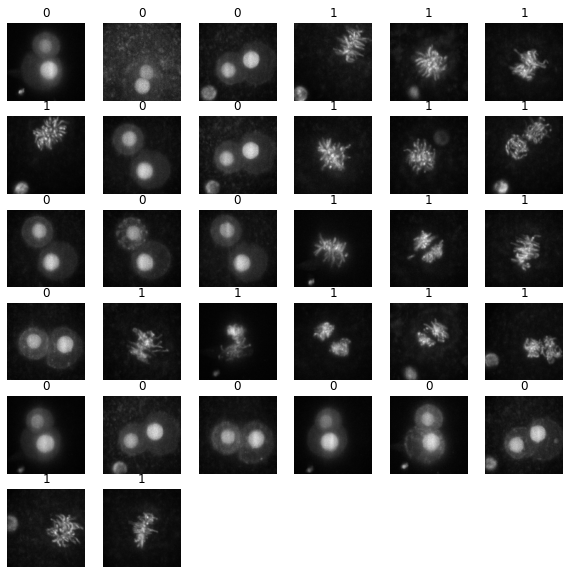

In [110]:
# Show images with labels
plt.figure(figsize=(10, 10))
class_names = ds_train.class_names
for images, labels in ds_train.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [255]:
train_dataset.class_indices

{'0': 0, '1': 1}

In [100]:
model = models.Sequential()
model.add(layers.RandomFlip("horizontal_and_vertical")),
model.add(layers.RandomContrast(0.1)),
model.add(layers.RandomContrast(0.15)),
model.add(layers.RandomContrast(0.2)),
model.add(layers.RandomContrast(0.25)),
model.add(layers.RandomContrast(0.3)),
model.add(layers.RandomContrast(0.35)),
model.add(layers.RandomContrast(0.4)),
model.add(layers.RandomContrast(0.45)),
model.add(layers.RandomContrast(0.5)),
model.add(layers.RandomContrast(0.5)),
model.add(layers.RandomRotation(0.1)),
model.add(layers.RandomRotation(0.15)),
model.add(layers.RandomRotation(0.2)),
model.add(layers.RandomRotation(0.25)),
model.add(layers.RandomRotation(0.3)),
model.add(layers.RandomRotation(0.35)),
model.add(layers.RandomRotation(0.4)),
model.add(layers.RandomRotation(0.45)),
model.add(layers.RandomRotation(0.5)),
model.add(layers.RandomRotation(0.55)),
model.add(layers.RandomRotation(0.6)),
model.add(layers.RandomRotation(0.65)),
model.add(layers.RandomRotation(0.7)),
model.add(layers.RandomRotation(0.75)),
model.add(layers.RandomRotation(0.8)),
model.add(layers.RandomRotation(0.85)),
model.add(layers.RandomRotation(0.9)),
model.add(layers.RandomRotation(0.95)),

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.ZeroPadding2D(padding=(1, 1))),
model.add(layers.Conv2D(64, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Conv2D(128, (3, 3), activation='relu')),
model.add(layers.MaxPooling2D((2, 2))),
model.add(layers.Flatten()),
model.add(layers.Dense(256, activation='relu')),
model.add(Dense(units=1, activation='sigmoid'))

In [102]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model.fit(ds_train, epochs=30, verbose=1, validation_data=ds_test)

Epoch 1/30
6/6 [==============================] - 39s 3s/step - loss: 138.4645 - accuracy: 0.5795 - val_loss: 0.2232 - val_accuracy: 0.9070
Epoch 2/30
6/6 [==============================] - 19s 3s/step - loss: 2.9120 - accuracy: 0.6477 - val_loss: 4.9077 - val_accuracy: 0.3721
Epoch 3/30
6/6 [==============================] - 19s 3s/step - loss: 1.4863 - accuracy: 0.5398 - val_loss: 3.1765 - val_accuracy: 0.3721
Epoch 4/30
6/6 [==============================] - 19s 3s/step - loss: 0.3793 - accuracy: 0.8352 - val_loss: 1.6349 - val_accuracy: 0.3721
Epoch 5/30
6/6 [==============================] - 19s 3s/step - loss: 0.2868 - accuracy: 0.8636 - val_loss: 0.2965 - val_accuracy: 0.8372
Epoch 6/30
6/6 [==============================] - 19s 3s/step - loss: 0.2373 - accuracy: 0.9091 - val_loss: 0.6605 - val_accuracy: 0.6279
Epoch 7/30
6/6 [==============================] - 19s 3s/step - loss: 0.3151 - accuracy: 0.8750 - val_loss: 0.2427 - val_accuracy: 0.8837
Epoch 8/30
6/6 [================

In [103]:
dir_test = 'embryo_15_csvs_jpg'
ds_new_embryo = tf.keras.preprocessing.image_dataset_from_directory(dir_test,
                                                              color_mode = 'rgb',
                                                              image_size = (256, 256),
                                                              shuffle = True,
                                                              seed = 123,
                                                                batch_size = 85)

Found 18 files belonging to 1 classes.


In [104]:
y_pred = model.predict(ds_new_embryo)

1/1 [==============================] - 1s 577ms/step


In [105]:
y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

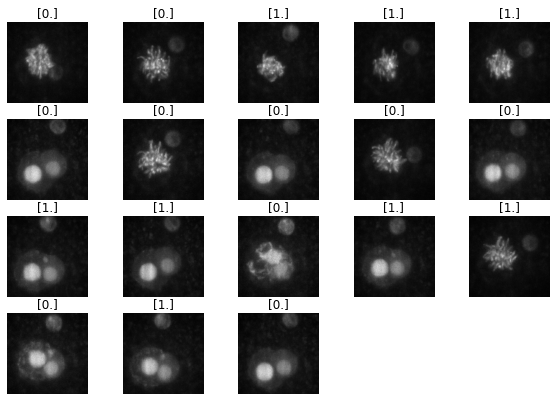

In [106]:
plt.figure(figsize=(10, 30))
for images, labels in ds_new_embryo.take(1):
    for i in range(18):
        ax = plt.subplot(17, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(y_pred[i])
        plt.tight_layout
        plt.axis("off")